In [1]:
# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.titlepad'] = 12
plt.rcParams['figure.dpi'] = 150
mpl.rcParams['font.family'] = 'Serif'

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from feature_engine.discretisation import EqualFrequencyDiscretiser
from category_encoders.woe import WOEEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from scipy import interp
from matplotlib import patches

In [2]:
df = pd.read_csv(r"C:\Users\imodg\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dfcopy = df.copy(deep = True)
dfcopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dfcopy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
dfcopy['Glucose'].fillna(dfcopy['Glucose'].mean(), inplace = True)
dfcopy['BloodPressure'].fillna(dfcopy['BloodPressure'].mean(), inplace = True)
dfcopy['SkinThickness'].fillna(dfcopy['SkinThickness'].median(), inplace = True)
dfcopy['Insulin'].fillna(dfcopy['Insulin'].median(), inplace = True)
dfcopy['BMI'].fillna(dfcopy['BMI'].median(), inplace = True)

In [7]:
label_encoder = preprocessing.LabelEncoder()
dfcopy['Glucose_type']=label_encoder.fit_transform(df['Glucose'])
dfcopy['Insulin_type']=label_encoder.fit_transform(df['Insulin'])

In [8]:
del dfcopy['Glucose']
del dfcopy['Insulin']

In [9]:
dfcopy.head()

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_type,Insulin_type
0,6,72.0,35.0,33.6,0.627,50,1,86,0
1,1,66.0,29.0,26.6,0.351,31,0,23,0
2,8,64.0,29.0,23.3,0.672,32,1,121,0
3,1,66.0,23.0,28.1,0.167,21,0,27,62
4,0,40.0,35.0,43.1,2.288,33,1,75,102


In [10]:
x=dfcopy[['Pregnancies','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Glucose_type','Insulin_type']]
y=dfcopy[['Outcome']]
x.shape

(768, 8)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=30)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#scaled the x (train and test data)
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled=scaler.transform(x_test)
print("Mean value:",x_train_scaled.mean(axis=0))
print("SD value:",x_train_scaled.std(axis=0))

Mean value: [ 3.36978262e-17  1.01695226e-16  3.36978262e-17 -4.69362580e-16
  9.62795035e-17 -1.78117081e-16  2.64768635e-17  6.07764366e-17]
SD value: [1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
gaus=GaussianNB()
gaus.fit(x_train_scaled, y_train)

GaussianNB()

GaussianNB()

In [14]:
gaus.score(x_test_scaled,y_test)*100

83.33333333333334

In [15]:
prediction = gaus.predict(x_test_scaled)

print(prediction)

[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0]


In [16]:
from sklearn.metrics import confusion_matrix
conmat=confusion_matrix(y_test,prediction)
print(conmat)

[[22  3]
 [ 2  3]]




ROC CURVE CODE BEGINS HERE:

In [17]:
# data=pd.read_csv(r"C:\Users\imodg\Downloads\diabetes.csv")

from sklearn.metrics import roc_auc_score

In [18]:
print(dfcopy.columns)

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_type',
       'Insulin_type'],
      dtype='object')


In [19]:
lvc= dfcopy.value_counts()
print(lvc)

Pregnancies  BloodPressure  SkinThickness  BMI   DiabetesPedigreeFunction  Age  Outcome  Glucose_type  Insulin_type
0            40.0           35.0           43.1  2.288                     33   1        75            102             1
             50.0           29.0           21.9  0.254                     65   0        99            0               1
5            72.0           23.0           26.2  0.245                     30   0        59            71              1
                            28.0           23.9  0.407                     27   0        49            0               1
                            29.0           36.9  0.159                     28   0        43            157             1
                                                                                                                      ..
2            56.0           27.0           29.0  0.426                     22   0        44            99              1
                            28.0     

In [20]:
print(dfcopy.info)

<bound method DataFrame.info of      Pregnancies  BloodPressure  SkinThickness   BMI  \
0              6           72.0           35.0  33.6   
1              1           66.0           29.0  26.6   
2              8           64.0           29.0  23.3   
3              1           66.0           23.0  28.1   
4              0           40.0           35.0  43.1   
..           ...            ...            ...   ...   
763           10           76.0           48.0  32.9   
764            2           70.0           27.0  36.8   
765            5           72.0           23.0  26.2   
766            1           60.0           29.0  30.1   
767            1           70.0           31.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Glucose_type  Insulin_type  
0                       0.627   50        1            86             0  
1                       0.351   31        0            23             0  
2                       0.672   32        1           121             0  

In [21]:
dict = {'Outcome':{'Diabetic':1,'Not Diabetic':0}}

In [22]:
dfcopy.replace(dict, inplace=True)
x= dfcopy.loc[:, dfcopy.columns !='Outcome']
y=dfcopy.loc[:, 'Outcome']

In [23]:
random_state = np.random.RandomState(0)

clf = RandomForestClassifier(random_state=random_state)

cv = StratifiedKFold(n_splits=5, shuffle=False)

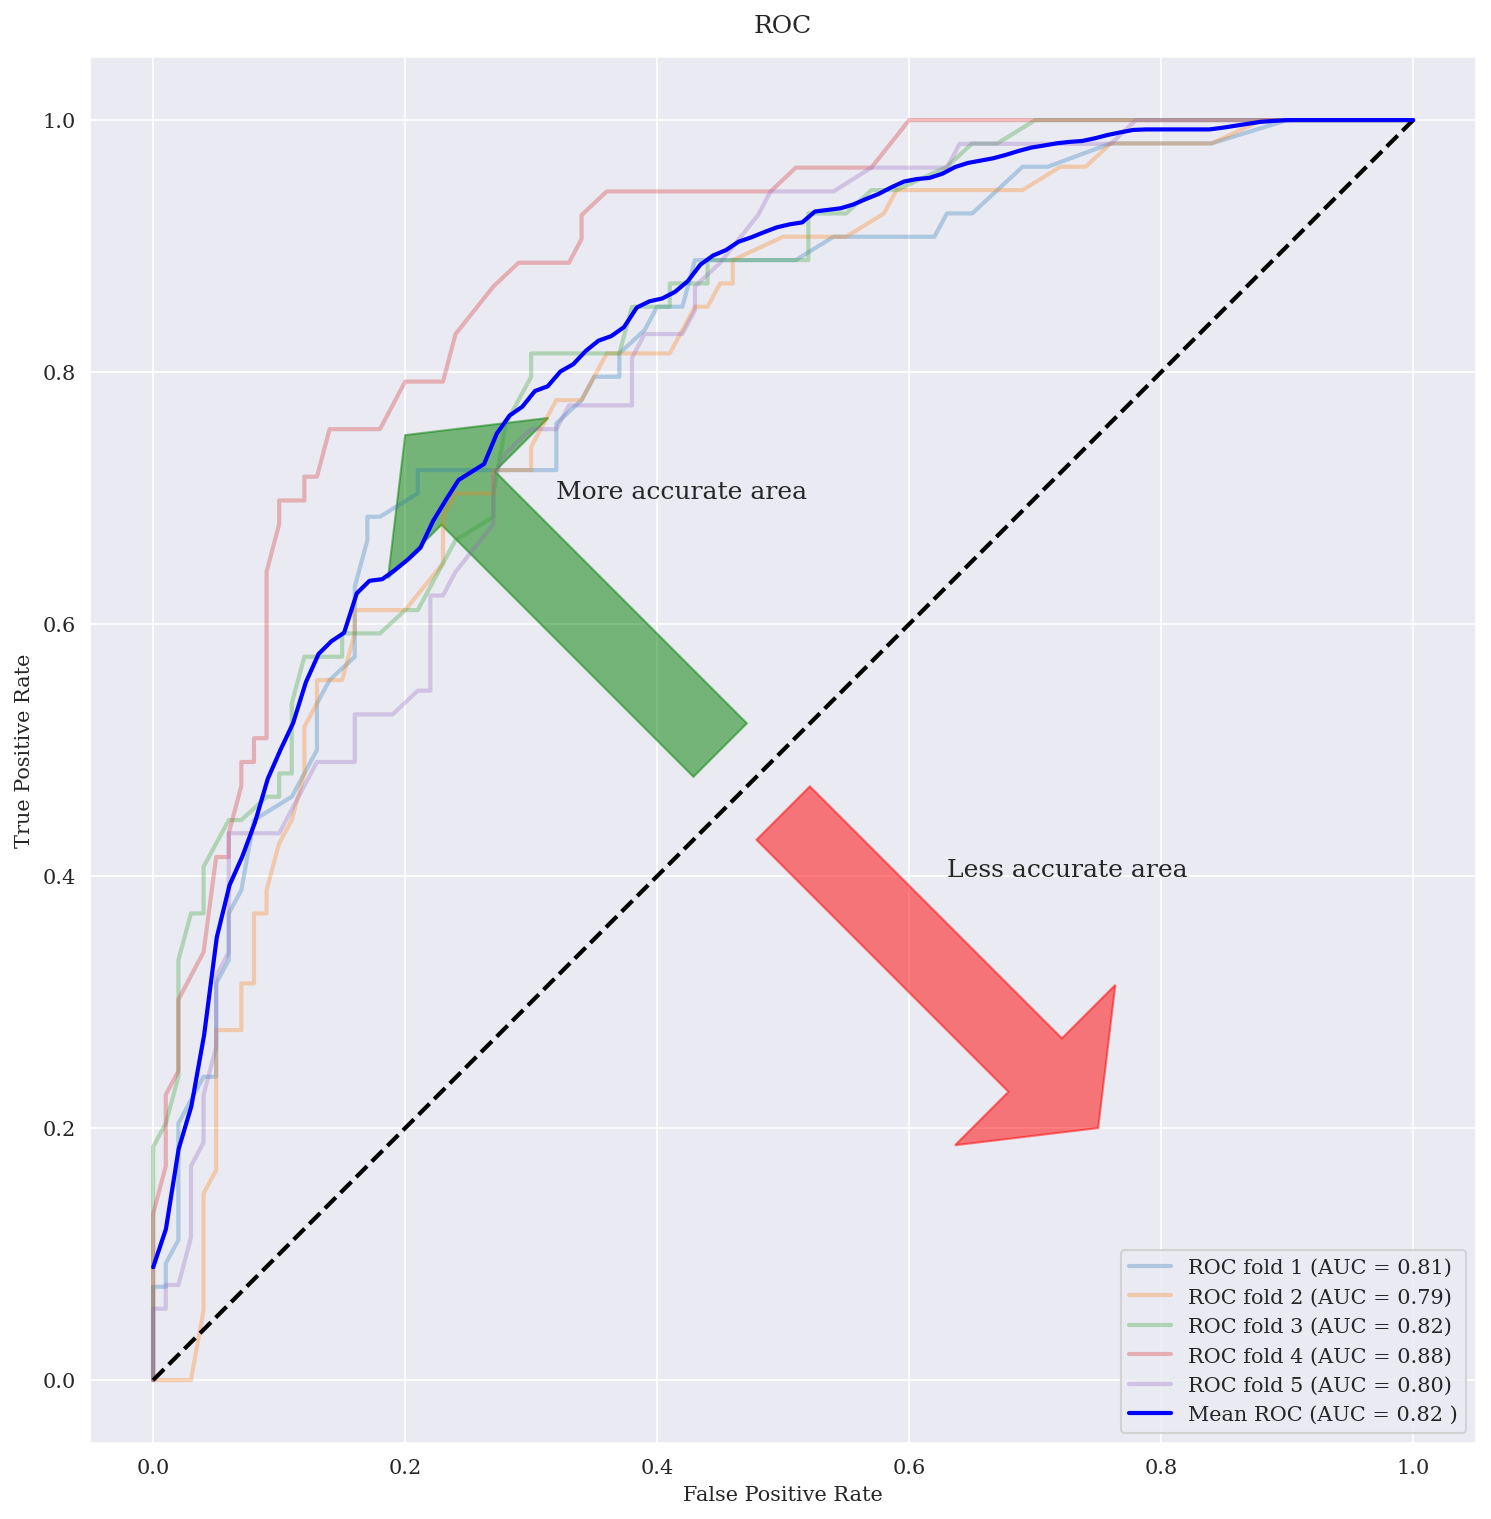

In [24]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv(r"C:\Users\imodg\Downloads\diabetes.csv")

In [ ]:
plt.figure(figsize=(10, 10))

In [ ]:
sns.heatmap(dfcopy.corr(), annot=True, linewidth=0.5)

Classification report

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
np.random.seed(1)

df=pd.read_csv(r"C:\Users\imodg\Downloads\diabetes.csv")

dfcopy.head()

In [ ]:
x=dfcopy[['Pregnancies','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']]
y=dfcopy[['Outcome']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
Logistic_regression= LogisticRegression()

Logistic_regression.fit(x_train,y_train)

In [ ]:
y_pred = Logistic_regression.predict(x_test)


print(classification_report(y_test, y_pred))